In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy import cluster

np.random.seed(42)

In [2]:
header = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'length_g', 'type']
seeds = pd.read_csv('seeds_dataset.txt', delimiter='\t+', names=header, engine='python')

In [3]:
seeds.describe()

,area,perimeter,compactness,length,width,asymmetry,length_g,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


# K-means 

In [4]:
#Стандартизация данных
seeds_target = np.array(seeds.type)
seeds_target -= 1
seeds.drop(['type'],axis=1)
seeds_scaled = preprocessing.scale(seeds)

# Обучаем K-means и сравниваем метки
km = KMeans(n_clusters=3, n_jobs=-1)
pred_small = km.fit_predict(seeds_scaled)

seeds_target

C:\Users\zloil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [5]:
pred_small

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0.5, 1.0, 'Работа K-means')

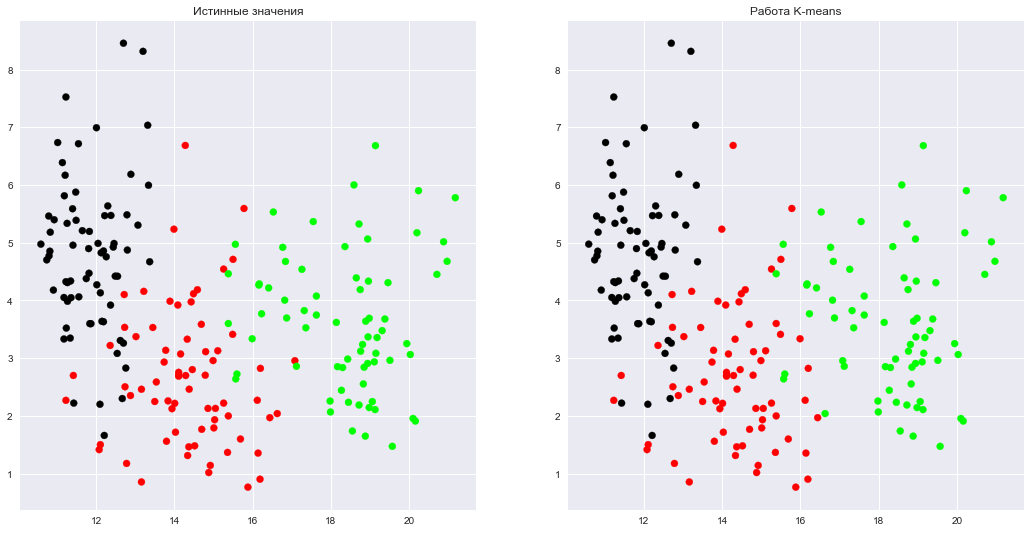

In [6]:
plt.style.use('seaborn')
plt.figure(figsize=(18, 9))
 
colormap = np.array(['red', 'lime', 'black'])
colormap2 = np.array(['lime', 'black', 'red'])
 
plt.subplot(1, 2, 1)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap[seeds_target])
plt.title('Истинные значения')
 
plt.subplot(1, 2, 2)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap2[pred_small])
plt.title('Работа K-means')

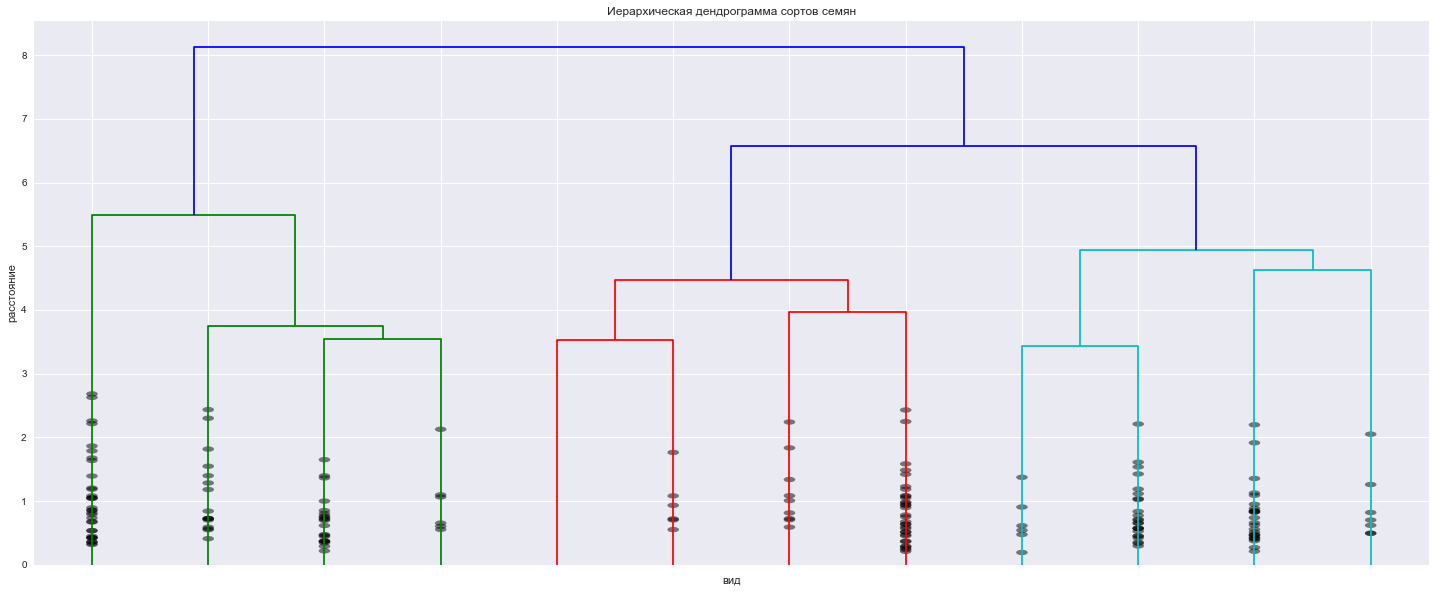

In [7]:
#Обучение
distances = pdist(seeds_scaled, "euclidean")
ie = linkage(seeds_scaled, method="complete")

#Дендрограмма
fig = plt.figure(figsize=(25, 10))
plt.title("Иерархическая дендрограмма сортов семян")
plt.xlabel("вид")
plt.ylabel("расстояние")
dn = dendrogram(ie,
    truncate_mode="lastp", 
    p=12,  
    show_leaf_counts=False, 
    show_contracted=True)

Text(0.5, 1.0, 'Работа иерархической кластеризации')

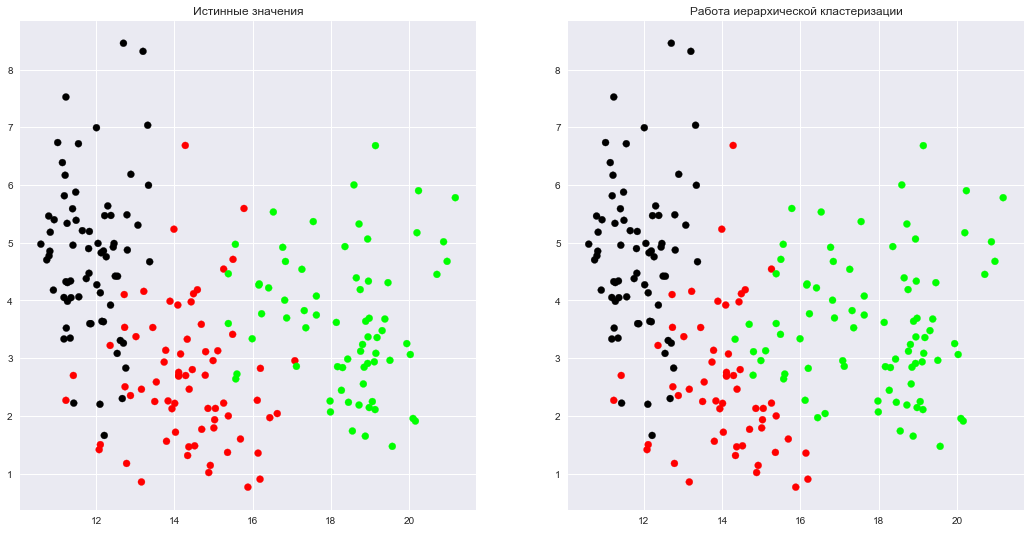

In [8]:
#Обрежем дерево
cutree = cluster.hierarchy.cut_tree(ie, n_clusters=[3])
tree_target = np.array(cutree)
tree_target = pd.Series( (v[0] for v in tree_target) )

#Построим график
plt.figure(figsize=(18, 9))
 
colormap = np.array(['red', 'lime', 'black'])
colormap3 = np.array(['red', 'lime', 'black'])
 
plt.subplot(1, 2, 1)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap[seeds_target])
plt.title('Истинные значения')
 
plt.subplot(1, 2, 2)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap3[tree_target])
plt.title('Работа иерархической кластеризации')

# DBSCAN

Text(0.5, 1.0, 'Работа DBSCAN')

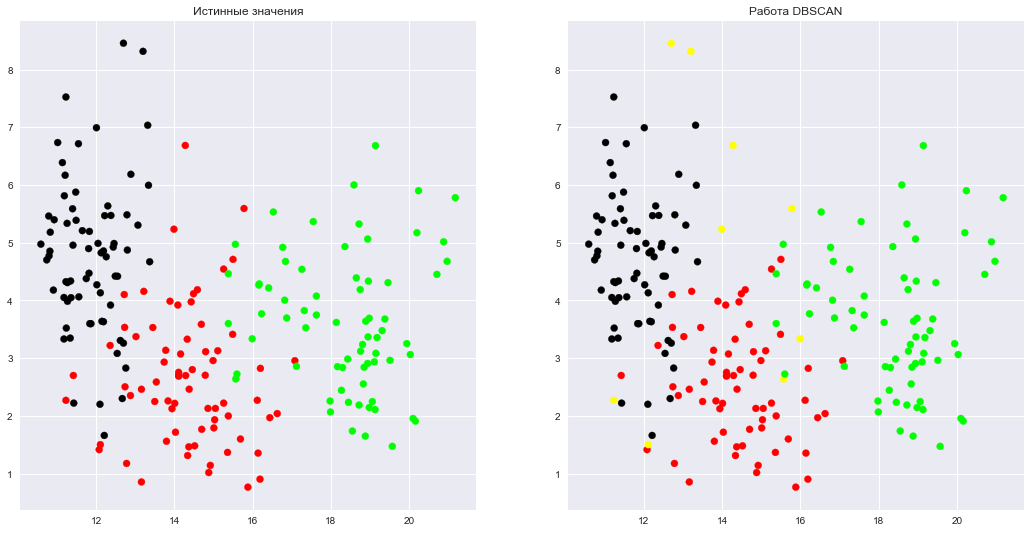

In [9]:
# Определяем модель
dbscan = DBSCAN(eps=1.23, min_samples=5, algorithm='brute')
 
# Обучаем
dbscan.fit(seeds_scaled)

#Построим график
plt.figure(figsize=(18, 9))
 
colormap = np.array(['red', 'lime', 'black'])
colormap3 = np.array(['red', 'lime', 'black', 'yellow'])
 
plt.subplot(1, 2, 1)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap[seeds_target])
plt.title('Истинные значения')
 
plt.subplot(1, 2, 2)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap3[dbscan.labels_])
plt.title('Работа DBSCAN')

## Построим большой сравнительный график работы алгоритмов

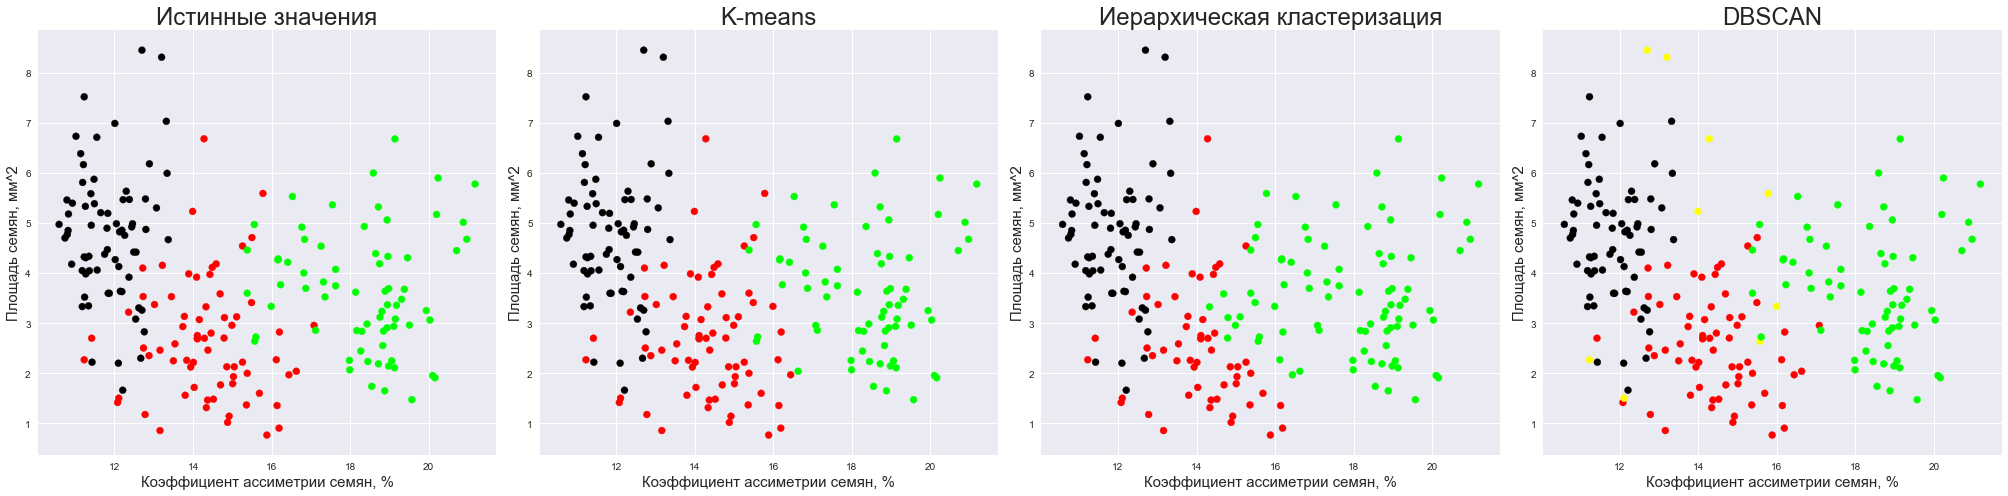

In [10]:
plt.figure(figsize=(28, 7))
colormap = np.array(['red', 'lime', 'black'])
colormap2 = np.array(['lime', 'black', 'red'])
 
plt.subplot(1, 4, 1)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap[seeds_target])
plt.title('Истинные значения', fontsize=24)
plt.xlabel("Коэффициент ассиметрии семян, %", fontsize=15)
plt.ylabel("Площадь семян, мм^2", fontsize=15)
 
plt.subplot(1, 4, 2)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap2[pred_small])
plt.title('K-means', fontsize=24)
plt.xlabel("Коэффициент ассиметрии семян, %", fontsize=15)
plt.ylabel("Площадь семян, мм^2", fontsize=15)

plt.subplot(1, 4, 3)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap3[tree_target])
plt.title('Иерархическая кластеризация', fontsize=24)
plt.xlabel("Коэффициент ассиметрии семян, %", fontsize=15)
plt.ylabel("Площадь семян, мм^2", fontsize=15)

plt.subplot(1, 4, 4)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap3[dbscan.labels_])
plt.title('DBSCAN', fontsize=24)
plt.xlabel("Коэффициент ассиметрии семян, %", fontsize=15)
plt.ylabel("Площадь семян, мм^2", fontsize=15)

plt.tight_layout()
plt.savefig('plot.png', format='png')